### Fit a Gaussian curve for the combined signal of a BAO-like gaussian, and a Ca H&K-like gaussian

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import lmfit
from collections import namedtuple

The Gaussian fit function takes 3 parameters:
* center along the $x$-axis
* peak height
* width in standard deviations

and additional 2 for the background signal:
* an offset along the $y$-axis
* an arbitrary slope 

In [22]:
params = lmfit.Parameters()
params.add('x_offset', 0., min=-5, max=5)
params.add('height', 0., min=0, max=5)
params.add('width', 1.5, min=0, max=5)
params.add('y_offset', 0., min=-5, max=5)
params.add('slope', 0, min=-0.1, max=0.1)

In [23]:
def fit_function(params, data, x):
    v = params.valuesdict()
    y = np.exp(- ((x - v['x_offset'])/v['width'])**2)*v['height'] + v['y_offset'] + v['slope']*x
    diff = y - data
    return diff

Set up fixed values:

In [24]:
x = np.linspace(-5, 5, 501)
y = np.exp(-x**2)
relative_amplitude = 1./20
# 4 Mpc vs roughly 20 Mpc for the BAO signal width
width = 4./20

* All $x$ values have units of $\sigma$ of the BAO gaussian

### An example displacement of 1.5$\sigma$

In [25]:
displacement = 1.5
y_pert = np.exp(-((x-displacement)/width)**2)*relative_amplitude

In [26]:
# The default LM method did not work well here:
fit_result = lmfit.minimize(fit_function, params, method='least_squares', kws={'data': y+y_pert, 'x': x})

In [27]:
fit_result.params

Parameters([('x_offset',
             <Parameter 'x_offset', 0.0044664544344437127, bounds=[-5:5]>),
            ('height', <Parameter 'height', 0.9951427018890584, bounds=[0:5]>),
            ('width', <Parameter 'width', 1.0112205942664187, bounds=[0:5]>),
            ('y_offset',
             <Parameter 'y_offset', 0.00065294327443166393, bounds=[-5:5]>),
            ('slope',
             <Parameter 'slope', 0.00022210892117647841, bounds=[-0.1:0.1]>)])

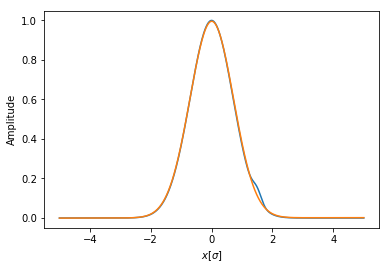

In [28]:
plt.plot(x,y+y_pert)
plt.plot(x,fit_function(fit_result.params, x*0, x))
plt.xlabel('$x[\sigma]$')
plt.ylabel('Amplitude')
plt.show()

### Plot the apparent displacement of the BAO signal vs. the 'ISM line' displacement

In [29]:
def f(displacement):
    y_pert = np.exp(-((x-displacement)/width)**2)*relative_amplitude
    fit_result = lmfit.minimize(fit_function, params, method='least_squares', kws={'data': y+y_pert, 'x': x})
    return fit_result.params['x_offset']
    

perturbation_displacement = np.linspace(0,4,100)
apparent_displacement = np.array([f(x) for x in perturbation_displacement])

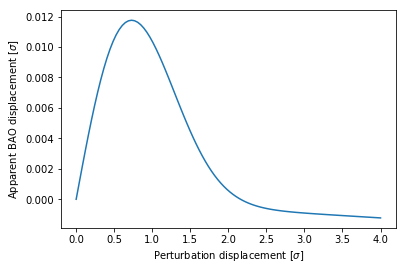

In [30]:
plt.plot(perturbation_displacement, apparent_displacement)
plt.xlabel('Perturbation displacement $[\sigma]$')
plt.ylabel('Apparent BAO displacement $[\sigma]$')
plt.show()

The peak occurs at:

In [31]:
max_pos = np.argmax(apparent_displacement)

In [32]:
from IPython.display import Latex
Latex('The maximum displacement of the apparent peak happens when the perturbation is at: ' 
      '$x={:.2}\,\sigma$'.format(perturbation_displacement[max_pos]))

<IPython.core.display.Latex object>

In [33]:
max_apparent_displacement = apparent_displacement[max_pos]
Latex('The maximum shift in the peak position is: '
      r'$y={0:.2}\,\sigma \approx {1:.2}\%$'.format(
        max_apparent_displacement, max_apparent_displacement*100))

<IPython.core.display.Latex object>

In [34]:
Latex('Shift relative to the position of the BAO peak: '
      r'${:.2}\%$'.format(max_apparent_displacement*100 * 10. / 100.))

<IPython.core.display.Latex object>